# Breast cancer analysis using Ludwig

In [1]:
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data from local directory
breast_cancer_dataset = pd.read_csv('./breast_cancer_dataset.csv')

In [3]:
# Split data for training and testing
from sklearn.model_selection import train_test_split

split = 0.3
breast_cancer_dataset_train, breast_cancer_dataset_test = train_test_split(breast_cancer_dataset, 
                                                                           test_size=split)
X_test = breast_cancer_dataset_test.drop(columns='label')
Y_test = breast_cancer_dataset_test['label']

In [4]:
# Train locally defined Ludwig model
from ludwig.api import LudwigModel

start_time = time.time()
model = LudwigModel(config='./LudwigModelDefinitionFile.yml')
train_stats = model.train(dataset=breast_cancer_dataset_train,
                          skip_save_model=True, 
                          skip_save_processed_input=True, 
                          skip_save_training_statistics=False, 
                          skip_save_training_description=True, 
                          skip_save_log=True, 
                          skip_save_progress=True)
training_time = time.time() - start_time

2022-02-01 20:18:37.314720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-01 20:18:37.314805: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-01 20:18:38.920203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-01 20:18:38.920280: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-01 20:18:38.920306: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e9977ec44554): /proc/driver/nvidia/version does not exist
2022-02-01 20:18:38.979473: I tensorflow/core/platform/cpu_featu

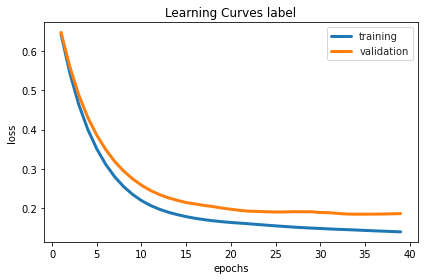

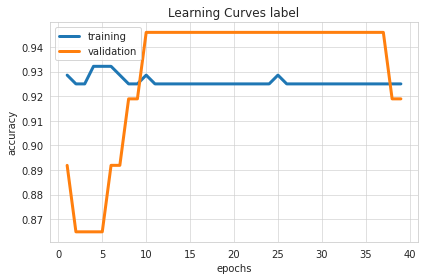

In [5]:
# Visualize training statistics
from ludwig.visualize import learning_curves

learning_curves(train_stats_per_model=train_stats[0], output_feature_name='label')

In [6]:
# Predict and print statistics
pred = model.predict(dataset=X_test)
predictions = pred[0]['label_predictions']
Y_test = Y_test == 1  # Change labels from 0/1 to False/True

pred_correct = []
for i in range(1, len(Y_test)):
    pred_correct.append(predictions.iloc[i-1] == Y_test.iloc[i-1])

print("No. of correct predictions = {}".format(sum(pred_correct)))
print("No. of incorrect predictions = {}".format(len(Y_test)-sum(pred_correct)))
print("Training time = {} seconds".format(round(training_time,2)))

No. of correct predictions = 163
No. of incorrect predictions = 8
Training time = 5.25 seconds
